In [90]:
import math

import ROOT as rt
import array as arr

from strangehelper import get_parabola

In [91]:
rt.gStyle.SetOptStat(0)

In [92]:
c = rt.TCanvas("c", "c", 800, 600)
c.SetRightMargin(0.05)
c.SetLeftMargin(0.13)
c.SetBottomMargin(0.13)
c.SetTopMargin(0.05)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [101]:
is_low_pt = True
is_high_pt = False
is_normal_pt = False
assert sum([is_low_pt, is_high_pt, is_normal_pt]) == 1, "only one pt range pls"

use_new_x_axis = True
lambda_phi_ratio = True

In [102]:
if is_low_pt:
    graph_infile = rt.TFile("output/final_yield_ratio_syst_lowpt.root")
elif is_high_pt:
    graph_infile = rt.TFile("output/final_yield_ratio_syst_highpt.root")
else:
    graph_infile = rt.TFile("output/final_yield_ratio_syst.root")

if use_new_x_axis:

    near_graph = graph_infile.Get("near_graph_new_x_axis")
    away_graph = graph_infile.Get("away_graph_new_x_axis")
    ue_graph = graph_infile.Get("ue_graph_new_x_axis")
    total_graph = graph_infile.Get("total_graph_new_x_axis")

    near_graph_final_syst = graph_infile.Get("near_graph_final_syst_new_x_axis")
    away_graph_final_syst = graph_infile.Get("away_graph_final_syst_new_x_axis")
    ue_graph_final_syst = graph_infile.Get("ue_graph_final_syst_new_x_axis")
    total_graph_final_syst = graph_infile.Get("total_graph_final_syst_new_x_axis")

    if lambda_phi_ratio:
        near_ratio_graph = graph_infile.Get("lambda_phi_near_ratio_graph_new_x_axis")
        away_ratio_graph = graph_infile.Get("lambda_phi_away_ratio_graph_new_x_axis")
        ue_ratio_graph = graph_infile.Get("lambda_phi_ue_ratio_graph_new_x_axis")
        total_ratio_graph = graph_infile.Get("lambda_phi_total_ratio_graph_new_x_axis")
        near_ratio_graph_final_syst = graph_infile.Get("lambda_phi_near_ratio_graph_final_syst_new_x_axis")
        away_ratio_graph_final_syst = graph_infile.Get("lambda_phi_away_ratio_graph_final_syst_new_x_axis")
        ue_ratio_graph_final_syst = graph_infile.Get("lambda_phi_ue_ratio_graph_final_syst_new_x_axis")
        total_ratio_graph_final_syst = graph_infile.Get("lambda_phi_total_ratio_graph_final_syst_new_x_axis")

    else:
        near_ratio_graph = graph_infile.Get("near_ratio_graph_new_x_axis")
        away_ratio_graph = graph_infile.Get("away_ratio_graph_new_x_axis")
        ue_ratio_graph = graph_infile.Get("ue_ratio_graph_new_x_axis")
        total_ratio_graph = graph_infile.Get("total_ratio_graph_new_x_axis")
        near_ratio_graph_final_syst = graph_infile.Get("near_ratio_graph_final_syst_new_x_axis")
        away_ratio_graph_final_syst = graph_infile.Get("away_ratio_graph_final_syst_new_x_axis")
        ue_ratio_graph_final_syst = graph_infile.Get("ue_ratio_graph_final_syst_new_x_axis")
        total_ratio_graph_final_syst = graph_infile.Get("total_ratio_graph_final_syst_new_x_axis")


else:
    near_graph = graph_infile.Get("near_graph")
    away_graph = graph_infile.Get("away_graph")
    ue_graph = graph_infile.Get("ue_graph")
    total_graph = graph_infile.Get("total_graph")

    near_graph_final_syst = graph_infile.Get("near_graph_final_syst")
    away_graph_final_syst = graph_infile.Get("away_graph_final_syst")
    ue_graph_final_syst = graph_infile.Get("ue_graph_final_syst")
    total_graph_final_syst = graph_infile.Get("total_graph_final_syst")

    if lambda_phi_ratio:
        near_ratio_graph = graph_infile.Get("lambda_phi_near_ratio_graph")
        away_ratio_graph = graph_infile.Get("lambda_phi_away_ratio_graph")
        ue_ratio_graph = graph_infile.Get("lambda_phi_ue_ratio_graph")
        total_ratio_graph = graph_infile.Get("lambda_phi_total_ratio_graph")
        near_ratio_graph_final_syst = graph_infile.Get("lambda_phi_near_ratio_graph_final_syst")
        away_ratio_graph_final_syst = graph_infile.Get("lambda_phi_away_ratio_graph_final_syst")
        ue_ratio_graph_final_syst = graph_infile.Get("lambda_phi_ue_ratio_graph_final_syst")
        total_ratio_graph_final_syst = graph_infile.Get("lambda_phi_total_ratio_graph_final_syst")

    else:
        near_ratio_graph = graph_infile.Get("near_ratio_graph")
        away_ratio_graph = graph_infile.Get("away_ratio_graph")
        ue_ratio_graph = graph_infile.Get("ue_ratio_graph")
        total_ratio_graph = graph_infile.Get("total_ratio_graph")
        near_ratio_graph_final_syst = graph_infile.Get("near_ratio_graph_final_syst")
        away_ratio_graph_final_syst = graph_infile.Get("away_ratio_graph_final_syst")
        ue_ratio_graph_final_syst = graph_infile.Get("ue_ratio_graph_final_syst")
        total_ratio_graph_final_syst = graph_infile.Get("total_ratio_graph_final_syst")


Info in <TCanvas::Print>: pdf file figures/lambda_phi_ratio_plot_new_x_axis_lowpt.pdf has been created


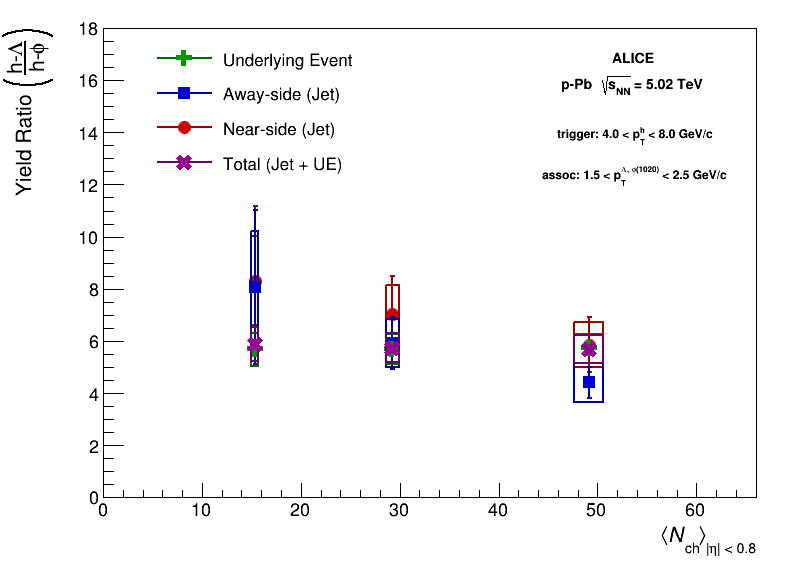

In [103]:
near_ratio_graph.SetMarkerStyle(20)
near_ratio_graph.SetMarkerSize(1.5)
near_ratio_graph.SetMarkerColor(rt.kRed+1)
near_ratio_graph.SetLineColor(rt.kRed+2)
near_ratio_graph.SetLineWidth(2)
near_ratio_graph.GetXaxis().SetTitle("Multiplicity Percentile")
near_ratio_graph.GetXaxis().SetTitleSize(0.05)
near_ratio_graph.GetXaxis().SetLabelSize(0.04)
near_ratio_graph.GetXaxis().SetTitleOffset(0.9)
near_ratio_graph.GetXaxis().SetRangeUser(0.0, 100.0)
near_ratio_graph.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-h}#right)")
near_ratio_graph.GetYaxis().SetTitleSize(0.04)
near_ratio_graph.GetYaxis().SetTitleOffset(1.5)
near_ratio_graph.GetYaxis().SetRangeUser(0.0002, 0.0035)

near_ratio_graph_final_syst.SetMarkerStyle(20)
near_ratio_graph_final_syst.SetMarkerSize(0)
near_ratio_graph_final_syst.SetMarkerColor(rt.kRed+1)
near_ratio_graph_final_syst.SetLineColor(rt.kRed+2)
near_ratio_graph_final_syst.SetLineWidth(2)
near_ratio_graph_final_syst.SetFillStyle(0)


away_ratio_graph.SetMarkerStyle(21)
away_ratio_graph.SetMarkerSize(1.5)
away_ratio_graph.SetMarkerColor(rt.kBlue+1)
away_ratio_graph.SetLineColor(rt.kBlue+2)
away_ratio_graph.SetLineWidth(2)

away_ratio_graph_final_syst.SetMarkerStyle(21)
away_ratio_graph_final_syst.SetMarkerSize(0)
away_ratio_graph_final_syst.SetMarkerColor(rt.kBlue+1)
away_ratio_graph_final_syst.SetLineColor(rt.kBlue+2)
away_ratio_graph_final_syst.SetLineWidth(2)
away_ratio_graph_final_syst.SetFillStyle(0)

ue_ratio_graph.SetMarkerStyle(34)
ue_ratio_graph.SetMarkerSize(2)
ue_ratio_graph.SetMarkerColor(rt.kGreen+2)
ue_ratio_graph.SetLineColor(rt.kGreen+3)
ue_ratio_graph.SetLineWidth(2)

ue_ratio_graph_final_syst.SetMarkerSize(0)
ue_ratio_graph_final_syst.SetMarkerColor(rt.kGreen+2)
ue_ratio_graph_final_syst.SetLineColor(rt.kGreen+3)
ue_ratio_graph_final_syst.SetLineWidth(2)
ue_ratio_graph_final_syst.SetFillStyle(0)

total_ratio_graph.SetMarkerStyle(47)
total_ratio_graph.SetMarkerSize(2)
total_ratio_graph.SetMarkerColor(rt.kMagenta+2)
total_ratio_graph.SetLineColor(rt.kMagenta+3)
total_ratio_graph.SetLineWidth(2)
total_ratio_graph.SetFillColor(rt.kMagenta+1)
total_ratio_graph.SetFillStyle(3144)

total_ratio_graph_final_syst.SetMarkerSize(0)
total_ratio_graph_final_syst.SetMarkerColor(rt.kMagenta+2)
total_ratio_graph_final_syst.SetLineColor(rt.kMagenta+3)
total_ratio_graph_final_syst.SetLineWidth(2)
total_ratio_graph_final_syst.SetFillColor(rt.kMagenta+1)
total_ratio_graph_final_syst.SetFillStyle(0)

ratios_legend = rt.TLegend(0.183, 0.686, 0.461, 0.928)
ratios_legend.SetMargin(0.35)
ratios_legend.AddEntry(ue_ratio_graph, "Underlying Event", "pl")
ratios_legend.AddEntry(away_ratio_graph, "Away-side (Jet)", "pl")
ratios_legend.AddEntry(near_ratio_graph, "Near-side (Jet)", "pl")
ratios_legend.AddEntry(total_ratio_graph, "Total (Jet + UE)", "pl")
ratios_legend.SetLineWidth(0)

pt_range_label = rt.TPaveText(0.6687, 0.6585, 0.9282, 0.7979, "NDC")
pt_range_label.AddText("trigger: 4.0 < p_{T}^{h} < 8.0 GeV/c")
if lambda_phi_ratio:
    if is_low_pt:
        pt_range_label.AddText("assoc: 1.5 < p_{T}^{#Lambda, #phi(1020)} < 2.5 GeV/c")
    elif is_high_pt:
        pt_range_label.AddText("assoc: 2.5 < p_{T}^{#Lambda, #phi(1020)} < 4.0 GeV/c")
    else:
        pt_range_label.AddText("assoc: 2.0 < p_{T}^{#Lambda, #phi(1020)} < 4.0 GeV/c")
else:
    if is_low_pt:
        pt_range_label.AddText("assoc: 1.5 < p_{T}^{#Lambda, h} < 2.5 GeV/c")
    elif is_high_pt:
        pt_range_label.AddText("assoc: 2.5 < p_{T}^{#Lambda, h} < 4.0 GeV/c")
    else:
        pt_range_label.AddText("assoc: 2.0 < p_{T}^{#Lambda, h} < 4.0 GeV/c")
pt_range_label.SetTextSizePixels(18)
pt_range_label.SetFillColor(rt.kWhite)
pt_range_label.SetBorderSize(0)

alice_data_label = rt.TPaveText(0.6982, 0.8258, 0.8987, 0.9251, "NDC")
alice_data_label.AddText("ALICE")
alice_data_label.AddText("p-Pb #sqrt{s_{NN}} = 5.02 TeV")
alice_data_label.GetLine(0).SetTextSizePixels(32)
alice_data_label.GetLine(1).SetTextSizePixels(24)
alice_data_label.SetBorderSize(0)
alice_data_label.SetFillColor(rt.kWhite)

if use_new_x_axis:
    plotting_hist = rt.TH1D("plotting_hist", "", 65, 0, 65)
    plotting_hist.SetMarkerStyle(20)
    plotting_hist.SetMarkerSize(1)
    plotting_hist.SetMarkerColor(rt.kRed+1)
    plotting_hist.SetLineColor(rt.kRed+2)
    plotting_hist.SetLineWidth(2)
    plotting_hist.GetXaxis().SetTitle("#LT#it{N}_{ch}#GT_{|#eta| < 0.8}")
    plotting_hist.GetXaxis().SetTitleSize(0.04)
    plotting_hist.GetXaxis().SetLabelSize(0.035)
    plotting_hist.GetXaxis().SetTitleOffset(1.2)
    plotting_hist.GetXaxis().SetRangeUser(0.0, 100.0)
    if lambda_phi_ratio:
        plotting_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-#phi}#right)")
    else:
        plotting_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-h}#right)")
    plotting_hist.GetYaxis().SetTitleSize(0.04)
    plotting_hist.GetYaxis().SetTitleOffset(1.5)
    plotting_hist.Draw("PE")
else:
    mult_bin_widths = arr.array('d', [0.0, 20.0, 50.0, 80.0, 100.0])
    plotting_hist = rt.TH1D("plotting_hist", "", 4, mult_bin_widths)
    plotting_hist.SetMarkerStyle(20)
    plotting_hist.SetMarkerSize(1)
    plotting_hist.SetMarkerColor(rt.kRed+1)
    plotting_hist.SetLineColor(rt.kRed+2)
    plotting_hist.SetLineWidth(2)
    plotting_hist.GetXaxis().SetTitle("Multiplicity Percentile")
    plotting_hist.GetXaxis().SetTitleSize(0.05)
    plotting_hist.GetXaxis().SetLabelSize(0.04)
    plotting_hist.GetXaxis().SetTitleOffset(1.2)
    plotting_hist.GetXaxis().SetRangeUser(0.0, 100.0)
    plotting_hist.SetStats(0)
    if lambda_phi_ratio:
        plotting_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-#phi}#right)")
    else:
        plotting_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-h}#right)")
    plotting_hist.GetYaxis().SetTitleSize(0.04)
    plotting_hist.GetYaxis().SetTitleOffset(1.5)
    plotting_hist.SetStats(0)
    plotting_hist.Draw("PE")
    plotting_hist.GetXaxis().SetLabelOffset(999)
    plotting_hist.GetXaxis().SetTickSize(0)
    rt.gPad.Update()
    new_axis = rt.TGaxis(rt.gPad.GetUxmax(),
            rt.gPad.GetUymin(),
            rt.gPad.GetUxmin(),
            rt.gPad.GetUymin(),
            plotting_hist.GetXaxis().GetXmin(),
            plotting_hist.GetXaxis().GetXmax(),
            510,"-")
    new_axis.SetLabelOffset(-0.03)
    new_axis.Draw("SAME")

if lambda_phi_ratio:
    if is_low_pt:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 18)
    elif is_high_pt:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 11)
    else:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 13)
else:
    if is_low_pt:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 0.2)
    elif is_high_pt:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 0.27)
    else:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 0.25)
plotting_hist.SetStats(0)

near_ratio_graph.Draw("PE SAME")
near_ratio_graph_final_syst.Draw("E2 SAME")
away_ratio_graph_final_syst.Draw("E2 SAME")
away_ratio_graph.Draw("PE SAME")
ue_ratio_graph_final_syst.Draw("E2 SAME")
ue_ratio_graph.Draw("PE SAME")
total_ratio_graph_final_syst.Draw("E2 SAME")
total_ratio_graph.Draw("PE SAME")
ratios_legend.Draw()
pt_range_label.Draw()
alice_data_label.Draw()
c.Draw()

if lambda_phi_ratio:
    if use_new_x_axis:
        if is_low_pt:
            c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis_lowpt.pdf")
        elif is_high_pt:
            c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis_highpt.pdf")
        else:
            c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis.pdf")
    else:
        if is_low_pt:
            c.SaveAs("figures/lambda_phi_ratio_plot_lowpt.pdf")
        elif is_high_pt:
            c.SaveAs("figures/lambda_phi_ratio_plot_highpt.pdf")
        else:
            c.SaveAs("figures/lambda_phi_ratio_plot.pdf")
else:
    if use_new_x_axis:
        if is_low_pt:
            c.SaveAs("figures/ratio_plot_new_x_axis_lowpt.pdf")
        elif is_high_pt:
            c.SaveAs("figures/ratio_plot_new_x_axis_highpt.pdf")
        else:
            c.SaveAs("figures/ratio_plot_new_x_axis.pdf")
    else:
        if is_low_pt:
            c.SaveAs("figures/ratio_plot_lowpt.pdf")
        elif is_high_pt:
            c.SaveAs("figures/ratio_plot_highpt.pdf")
        else:
            c.SaveAs("figures/ratio_plot.pdf")


near slope: -6.64e-02 \pm 7.03e-02
away slope: -8.55e-02 \pm 5.13e-02
ue slope: 1.73e-03 \pm 1.86e-03
total slope: -4.14e-03 \pm 2.97e-03

****************************************
Minimizer is Linear / Migrad
Chi2                      =    0.0123746
NDf                       =            1
p0                        =      9.09357   +/-   2.93162     
p1                        =   -0.0664475   +/-   0.0702813   

****************************************
Minimizer is Linear / Migrad
Chi2                      =     0.101846
NDf                       =            1
p0                        =      8.57899   +/-   2.27494     
p1                        =   -0.0855158   +/-   0.0513123   

****************************************
Minimizer is Linear / Migrad
Chi2                      =    0.0104789
NDf                       =            1
p0                        =      5.63585   +/-   0.0778629   
p1                        =   0.00172636   +/-   0.00185539  

******************************

Info in <TCanvas::Print>: pdf file figures/lambda_phi_ratio_plot_new_x_axis_lowpt_with_fits.pdf has been created


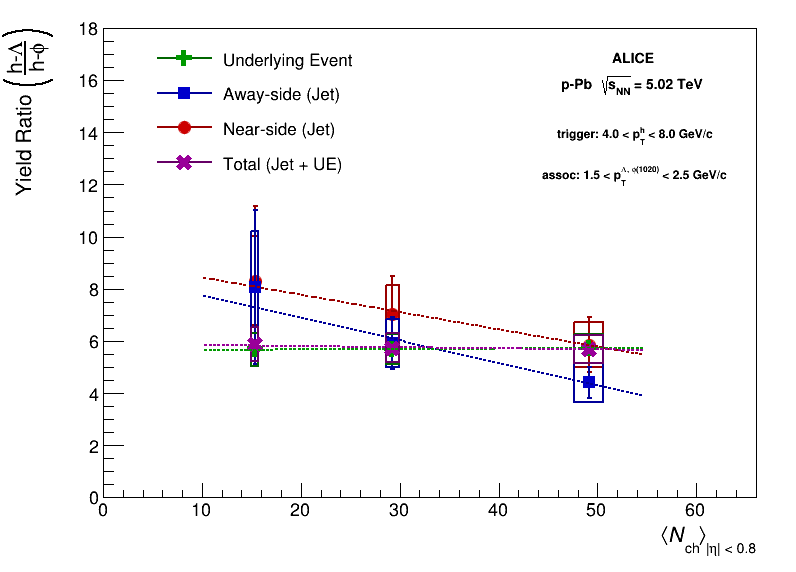

In [104]:
if use_new_x_axis:
    near_fit = rt.TF1("near_fit", "pol1", 10, 55)
    away_fit = rt.TF1("away_fit", "pol1", 10, 55)
    ue_fit = rt.TF1("ue_fit", "pol1", 10, 55)
    total_fit = rt.TF1("total_fit", "pol1", 10, 55)

    near_fit.SetLineColor(rt.kRed+2)
    near_fit.SetLineWidth(2)
    near_fit.SetLineStyle(2)

    away_fit.SetLineColor(rt.kBlue+2)
    away_fit.SetLineWidth(2)
    away_fit.SetLineStyle(2)

    ue_fit.SetLineColor(rt.kGreen+2)
    ue_fit.SetLineWidth(2)
    ue_fit.SetLineStyle(2)

    total_fit.SetLineColor(rt.kMagenta+2)
    total_fit.SetLineWidth(2)
    total_fit.SetLineStyle(2)

    near_ratio_graph.Fit(near_fit, "R")
    away_ratio_graph.Fit(away_fit, "R")
    ue_ratio_graph.Fit(ue_fit, "R")
    total_ratio_graph.Fit(total_fit, "R")

    near_fit.Draw("SAME")
    away_fit.Draw("SAME")
    ue_fit.Draw("SAME")
    total_fit.Draw("SAME")

    c.Draw()
    if lambda_phi_ratio:

        if is_low_pt:
            c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis_lowpt_with_fits.pdf")
        elif is_high_pt:
            c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis_highpt_with_fits.pdf")
        else:
            c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis_with_fits.pdf")
    else:
        if is_low_pt:
            c.SaveAs("figures/ratio_plot_new_x_axis_lowpt_with_fits.pdf")
        elif is_high_pt:
            c.SaveAs("figures/ratio_plot_new_x_axis_highpt_with_fits.pdf")
        else:
            c.SaveAs("figures/ratio_plot_new_x_axis_with_fits.pdf")

    near_fit_slope = near_fit.GetParameter(1)
    near_fit_slope_err = near_fit.GetParError(1)

    away_fit_slope = away_fit.GetParameter(1)
    away_fit_slope_err = away_fit.GetParError(1)

    ue_fit_slope = ue_fit.GetParameter(1)
    ue_fit_slope_err = ue_fit.GetParError(1)

    total_fit_slope = total_fit.GetParameter(1)
    total_fit_slope_err = total_fit.GetParError(1)


    print(f"near slope: {near_fit_slope:.2e} \\pm {near_fit_slope_err:.2e}")
    print(f"away slope: {away_fit_slope:.2e} \\pm {away_fit_slope_err:.2e}")
    print(f"ue slope: {ue_fit_slope:.2e} \\pm {ue_fit_slope_err:.2e}")
    print(f"total slope: {total_fit_slope:.2e} \\pm {total_fit_slope_err:.2e}")

